In [1]:
!pip install gym-super-mario-bros==7.3.0 nes_py

In [19]:
#Import the game
import gym_super_mario_bros
#Import the joypad wrapper
from nes_py.wrappers import JoypadSpace
#Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [3]:
#Install Pytorch
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu116


In [5]:
#Install stable baselines for RL Stuff
!pip install stable-baselines3[extra]

In [20]:
#Setup game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [17]:
# env.reset()
env.step(env.action_space.sample())

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [3]:
done = True
for step in range(100000):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    env.render()
env.close()

C:\Users\Andrew\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [4]:
env.close()

In [21]:
#Import Fram Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
#Import Vectorizing Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#Import matplotlib
from matplotlib import pyplot as plt

In [22]:
#Create the base envinronment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
#Gray scale
env = GrayScaleObservation(env, keep_dim=True)
#Wrap inside dummy env
env = DummyVecEnv([lambda:env])
#Stack the frames
env = VecFrameStack(env, 4, channels_order="last")

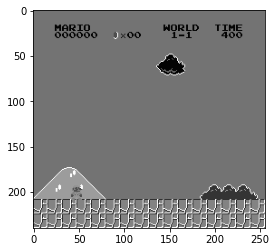

In [23]:
#show image of current state with matplotlib
plt.imshow(env.reset()[0])

In [24]:
#Import os for file path management
import os
#Import  PPO for algos
from stable_baselines3 import PPO
#Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [25]:
class TrainAndLoggingCallback(BaseCallback):
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
        
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
            
        return True

In [26]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [27]:
callback = TrainAndLoggingCallback(check_freq=100000, save_path=CHECKPOINT_DIR)

In [28]:
#This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cpu device
Wrapping the env in a VecTransposeImage.
